In [11]:
import pandas as pd
train = pd.read_csv("../dataset/train_tokens.csv")
train_token = train.text
##This part is altered when the tokens change

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
X_train_counts = CountVectorizer(lowercase = False).fit_transform(train_token)
##lowercase = False keeps the original form of the tokens, do not change

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
##Give weight values to the tokens

In [14]:
X = X_train_tfidf.toarray()
y = train.rating
##Converts it to a readable form for train_test_split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size=0.80, random_state=123456)
##Random state keeps the same split everytime

In [21]:
train_accuracy =[]
test_accuracy =[]
train_loss =[]
test_loss =[]
values = [i for i in range(1, 21)]

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
for i in values:
    lr = LogisticRegression(max_iter=i)
    lr.fit(X_train,y_train)
    # evaluate on the train dataset
    train_pr = lr.predict(X_train) 
    train_acc= accuracy_score(y_train, train_pr)
    train_accuracy.append(train_acc)
     #calculate loss   
    train_l = log_loss(y_train, train_pr)
    train_loss.append(train_l)
    # evaluate on the test dataset
    test_pr = lr.predict(X_test)
    test_acc = accuracy_score(y_test, test_pr)
    test_accuracy.append(test_acc)
    #calculate loss   
    test_l = log_loss(y_test, test_pr)
    test_loss.append(test_l)
    


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

In [26]:
print("SS: Accuracy\n")
for i in values:
    print('Iteration: %d, train: %.3f, test: %.3f' % (i, train_accuracy[i-1], test_accuracy[i-1]))

SS: Accuracy

Iteration: 1, train: 0.606, test: 0.594
Iteration: 2, train: 0.757, test: 0.743
Iteration: 3, train: 0.780, test: 0.768
Iteration: 4, train: 0.780, test: 0.766
Iteration: 5, train: 0.784, test: 0.772
Iteration: 6, train: 0.812, test: 0.797
Iteration: 7, train: 0.872, test: 0.852
Iteration: 8, train: 0.890, test: 0.870
Iteration: 9, train: 0.909, test: 0.883
Iteration: 10, train: 0.920, test: 0.887
Iteration: 11, train: 0.927, test: 0.886
Iteration: 12, train: 0.930, test: 0.884
Iteration: 13, train: 0.931, test: 0.885
Iteration: 14, train: 0.931, test: 0.884
Iteration: 15, train: 0.932, test: 0.882
Iteration: 16, train: 0.936, test: 0.886
Iteration: 17, train: 0.933, test: 0.884
Iteration: 18, train: 0.933, test: 0.884
Iteration: 19, train: 0.933, test: 0.883
Iteration: 20, train: 0.933, test: 0.883


In [29]:
print("SS: Loss\n")
for i in values:
    print('Iteration: %d, train: %.3f, test: %.3f' % (i, train_loss[i-1], test_loss[i-1]))

SS: Loss

Iteration: 1, train: 13.610, test: 14.016
Iteration: 2, train: 8.381, test: 8.863
Iteration: 3, train: 7.599, test: 8.027
Iteration: 4, train: 7.597, test: 8.075
Iteration: 5, train: 7.445, test: 7.882
Iteration: 6, train: 6.486, test: 7.005
Iteration: 7, train: 4.431, test: 5.105
Iteration: 8, train: 3.791, test: 4.490
Iteration: 9, train: 3.133, test: 4.055
Iteration: 10, train: 2.773, test: 3.910
Iteration: 11, train: 2.504, test: 3.937
Iteration: 12, train: 2.406, test: 4.000
Iteration: 13, train: 2.397, test: 3.986
Iteration: 14, train: 2.395, test: 4.020
Iteration: 15, train: 2.364, test: 4.069
Iteration: 16, train: 2.223, test: 3.944
Iteration: 17, train: 2.302, test: 4.000
Iteration: 18, train: 2.316, test: 4.007
Iteration: 19, train: 2.314, test: 4.027
Iteration: 20, train: 2.312, test: 4.041


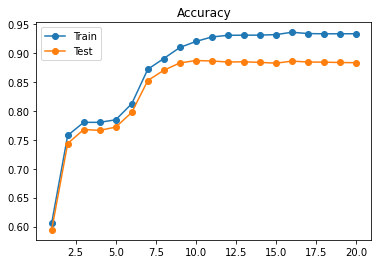

In [27]:
from matplotlib import pyplot
# plot of train and test scores vs iteration
pyplot.title("Accuracy")
pyplot.plot(values, train_accuracy, '-o', label='Train')
pyplot.plot(values, test_accuracy, '-o', label='Test')
pyplot.legend()
pyplot.savefig("ss_accuracy.png",dpi=1200)
pyplot.show()

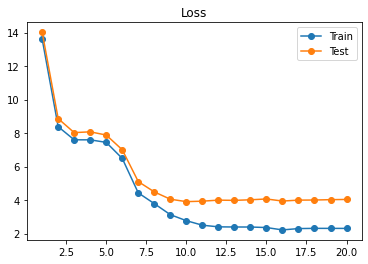

In [28]:
from matplotlib import pyplot
# plot of train and test scores vs iteration
pyplot.title("Loss")
pyplot.plot(values, train_loss, '-o', label='Train')
pyplot.plot(values, test_loss, '-o', label='Test')
pyplot.legend()
pyplot.savefig("ss_loss.png",dpi=1200)
pyplot.show()

In [270]:
from sklearn.metrics import accuracy_score

In [266]:
#y_predict = lr.predict(X_test)
##we will change this line when running to the test file after adjusting the max_iter

In [267]:
#print('Logistic Regression Train accuracy %s' % lr.score(X_train, y_train)) #Train accuracy
#print('Logistic Regression Test accuracy %s' % accuracy_score(y_predict, y_test)) #Test=Validation accuracy

Logistic Regression Train accuracy 0.93305
Logistic Regression Test accuracy 0.883
